In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D,Dropout,Dense,Flatten,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
dataset=r'C:\Users\Ranjith ch\Mask detector\dataset'
image_path=list(paths.list_images(dataset))

In [4]:
image_path

['C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_aidai_0014.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_aidai_0029.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_aidai_0043.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_aidai_0074.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_aidai_0084.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_aidai_0136.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_anhu_0004.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_anhu_0020.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_anhu_0025.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_anhu_0027.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_anhu_0056.jpg',
 'C:\\User

In [5]:
data=[]
labels=[]

for i in image_path:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)

C:\Users\Ranjith ch\anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [6]:
labels

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [7]:
data

[array([[[-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         ...,
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.84313726, -0.8980392 , -0.77254903]],
 
        [[-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         ...,
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.75686276, -0.7882353 , -0.67058825]],
 
        [[-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         ...,
         [-0.88235295, -0.8980392 , -0.7882353 ],
         [-0.8666667 , -0.88235295, -0.77254903],
         [-0.85882354, -0.8745098 , -0.7647059 ]],
 
        ...,
 
        [[ 0.3803922 , -0.9607843 

In [8]:
image

array([[[-0.5058824 ,  0.4039216 , -0.16862744],
        [-0.5058824 ,  0.4039216 , -0.16862744],
        [-0.5764706 ,  0.22352946, -0.29411763],
        ...,
        [-0.54509807, -0.4588235 , -0.5686275 ],
        [-0.47450978, -0.38823527, -0.5137255 ],
        [-0.47450978, -0.38823527, -0.5137255 ]],

       [[-0.5058824 ,  0.4039216 , -0.16862744],
        [-0.5058824 ,  0.4039216 , -0.16862744],
        [-0.5764706 ,  0.22352946, -0.29411763],
        ...,
        [-0.54509807, -0.4588235 , -0.5686275 ],
        [-0.47450978, -0.38823527, -0.5137255 ],
        [-0.47450978, -0.38823527, -0.5137255 ]],

       [[-0.5137255 ,  0.2941177 , -0.24705881],
        [-0.5137255 ,  0.2941177 , -0.24705881],
        [-0.6392157 ,  0.06666672, -0.41176468],
        ...,
        [-0.32549018, -0.26274508, -0.3490196 ],
        [-0.1607843 , -0.09803921, -0.18431371],
        [-0.1607843 , -0.09803921, -0.18431371]],

       ...,

       [[ 0.02745104, -0.12156862, -0.17647058],
        [ 0

In [9]:
data=np.array(data,dtype='float32')
labels = np.array(labels)

In [10]:
data.shape

(3833, 224, 224, 3)

In [11]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [12]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

In [13]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [14]:
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [15]:
train_X.shape

(3066, 224, 224, 3)

In [16]:
train_Y.shape

(3066, 2)

In [17]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [18]:
aug

In [19]:
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [20]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [21]:
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)
model=Model(inputs=baseModel.input,outputs=headModel)

In [22]:
for layer in baseModel.layers:
    layer.trainable=False

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [24]:
learning_rate=0.001
Epochs=20
BS=12

In [25]:
opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
A=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)





Epoch 1/20
255/255 [==============================] - 60s 236ms/step - loss: 0.1859 - accuracy: 0.9204 - val_loss: 0.0742 - val_accuracy: 0.9687
Epoch 2/20
255/255 [==============================] - 63s 245ms/step - loss: 0.1019 - accuracy: 0.9653 - val_loss: 0.0649 - val_accuracy: 0.9817
Epoch 3/20
255/255 [==============================] - 62s 244ms/step - loss: 0.0655 - accuracy: 0.9748 - val_loss: 0.0452 - val_accuracy: 0.9831
Epoch 4/20
255/255 [==============================] - 62s 244ms/step - loss: 0.0809 - accuracy: 0.9715 - val_loss: 0.0341 - val_accuracy: 0.9909
Epoch 5/20
255/255 [==============================] - 62s 245ms/step - loss: 0.0555 - accuracy: 0.9804 - val_loss: 0.0362 - val_accuracy: 0.9909
Epoch 6/20
255/255 [==============================] - 62s 241ms/step - loss: 0.0656 - accuracy: 0.9761 - val_loss: 0.0254 - val_accuracy: 0.9909
Epoch 7/20
255/255 [==============================] - 62s 244ms/step - loss: 0.0484 - accuracy: 0.9817 - val_loss: 0.0291 - val_ac

255/255 [==============================] - 65s 253ms/step - loss: 0.0418 - accuracy: 0.9833 - val_loss: 0.0228 - val_accuracy: 0.9948
Epoch 18/20
255/255 [==============================] - 66s 259ms/step - loss: 0.0470 - accuracy: 0.9823 - val_loss: 0.0313 - val_accuracy: 0.9896
Epoch 19/20
255/255 [==============================] - 65s 255ms/step - loss: 0.0361 - accuracy: 0.9879 - val_loss: 0.0958 - val_accuracy: 0.9726
Epoch 20/20
255/255 [==============================] - 66s 260ms/step - loss: 0.0405 - accuracy: 0.9830 - val_loss: 0.0294 - val_accuracy: 0.9896


In [26]:
model.save('mobilenet_v1.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mobilenet_v1.model\assets


In [27]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.98      0.99      0.99       383
without_mask       0.99      0.98      0.99       384

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(test_Y.argmax(axis=1),predict)

0.9895697522816167

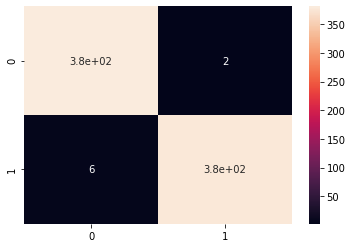

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_Y.argmax(axis=1), predict)
sns.heatmap(cm,annot=True)

In [30]:
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[381   2]
 [  6 378]]
acc: 0.9896
sensitivity: 0.9948
specificity: 0.9844


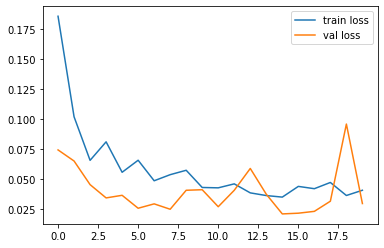

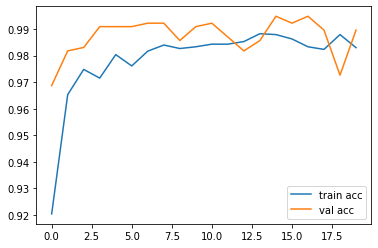

In [32]:
plt.plot(A.history['loss'], label='train loss')
plt.plot(A.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(A.history['accuracy'], label='train acc')
plt.plot(A.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

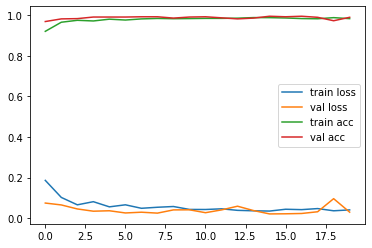

In [33]:
plt.plot(A.history['loss'], label='train loss')
plt.plot(A.history['val_loss'], label='val loss')
plt.plot(A.history['accuracy'], label='train acc')
plt.plot(A.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()